## Notebook showcasing the various options in Roodmus for analysis and visualisations
Each analysis functionality aims to compare output from a Single Particle Reconstruction workflow in RELION or CryoSPARC to the ground-truth information available from the generated Parakeet config files. The functions return a dictionary that can be converted to a pandas data frame for easy plotting and further analysis. This notebook allows the user as much flexibility as possible in creating their own analyses.

The provided tools include:
1. comparison of estimated and ground-truth CTF parameters
2. particle picking analysis

In [1]:
### imports
# general
import os

import mrcfile
import numpy as np
from importlib import reload
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roodmus
from roodmus.analysis.analyse_ctf import ctf_estimation
from roodmus.analysis.plot_ctf import plot_CTF, plot_defocus_scatter
import roodmus.analysis.analysis
reload(roodmus.analysis.analysis)
import roodmus.analysis.utils
reload(roodmus.analysis.utils)
from roodmus.analysis.analysis import particle_picking
from roodmus.analysis.plot_picking import label_micrograph_picked, label_micrograph_truth, label_micrograph_truth_and_picked


### CTF estimation


In [ ]:
### variables
config_dir = "data/6xm5_steered_Roodmus_1/mrc/"
meta_file = "data/6xm5_steered_Roodmus_1/cryoSPARC/J293_picked_particles.cs"

particle_diameter = 100 # approximate particle diameter in Angstroms
verbose = True

In [ ]:
### analyse CTF estimation
analysis_ctf = ctf_estimation(meta_file, config_dir, verbose=verbose)
df_ctf = pd.DataFrame(analysis_ctf.results)
df_ctf

In [ ]:
### scatter plot of the estimated vs. the true defocus values
fig, ax = plot_defocus_scatter(df_ctf)


In [ ]:
### plot the CTF estimation for a single micrograph
ugraph_index = 3 # which micrograph to plot

fig, ax = plot_CTF(df_ctf, config_dir, ugraph_index)

In [ ]:
### plot the CTF for the particle with the largest defocus error
delta_defocus = 0
for i, row in df_ctf.iterrows():
    defocusU = row["defocusU"]
    defocus_truth = row["defocus_truth"]
    if np.abs(defocusU - defocus_truth) > delta_defocus:
        delta_defocus = np.abs(defocusU - defocus_truth)
        max_error_index = int(row["ugraph_filename"].strip(".mrc"))

fig, ax = plot_CTF(df_ctf, config_dir, max_error_index)


### Particle picking

In [2]:
### variables
config_dir = "data/6xm5_steered_Roodmus_1/mrc/"
meta_files = [
    "data/6xm5_steered_Roodmus_1/cryoSPARC/J293_picked_particles.cs",
    "data/6xm5_steered_Roodmus_1/cryoSPARC/J297_passthrough_particles_selected.cs",
    "data/6xm5_steered_Roodmus_1/cryoSPARC/J298_picked_particles.cs",
    "data/6xm5_steered_Roodmus_1/cryoSPARC/J429_passthrough_particles_selected.cs",
    "data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs",
]

jobtypes = {
    "data/6xm5_steered_Roodmus_1/cryoSPARC/J293_picked_particles.cs": "blob picking",
    "data/6xm5_steered_Roodmus_1/cryoSPARC/J297_passthrough_particles_selected.cs": "2D classification",
    "data/6xm5_steered_Roodmus_1/cryoSPARC/J298_picked_particles.cs": "template picking",
    "data/6xm5_steered_Roodmus_1/cryoSPARC/J429_passthrough_particles_selected.cs": "2D classification 2",
    "data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs": "3D classification",   
}

particle_diameter = 100 # approximate particle diameter in Angstroms
verbose = True

In [3]:
### analyse the particle picking
for i, meta_file in enumerate(meta_files):
    if i == 0:
        analysis_picking = particle_picking(meta_file, config_dir, particle_diameter, verbose=verbose) # creates the class
    else:
        analysis_picking.compute(meta_file, config_dir, verbose=verbose) # updates the class with the next metadata file

loading metadata from data/6xm5_steered_Roodmus_1/cryoSPARC/J293_picked_particles.cs...
loaded metadata from data/6xm5_steered_Roodmus_1/cryoSPARC/J293_picked_particles.cs. determined file type: cs
extracted ugraph paths and positions from metadata file
(358378, 2)
358378
found 358378 particles in 200 micrographs
loaded 200 micrographs from data/6xm5_steered_Roodmus_1/cryoSPARC/J293_picked_particles.cs
dictionaries now contain 358378 particles and 0 true particles


loading ground-truth particle positions: 100%|██████████| 200/200 [00:48<00:00,  4.08it/s]


loaded ground-truth particle positions from config files
[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 25

calculating true positive picked particles and unpicked truth particles: 100%|██████████| 200/200 [01:28<00:00,  2.26it/s]


0 micrographs were not picked
loading metadata from data/6xm5_steered_Roodmus_1/cryoSPARC/J297_passthrough_particles_selected.cs...
loaded metadata from data/6xm5_steered_Roodmus_1/cryoSPARC/J297_passthrough_particles_selected.cs. determined file type: cs
extracted ugraph paths and positions from metadata file
(11634, 2)
11634
found 11634 particles in 200 micrographs
loaded 200 micrographs from data/6xm5_steered_Roodmus_1/cryoSPARC/J297_passthrough_particles_selected.cs
dictionaries now contain 370012 particles and 50000 true particles


loading ground-truth particle positions:   2%|▏         | 200/11634 [00:04<04:35, 41.57it/s]


dictionaries now contain 370012 particles and 100000 true particles
calculating true positive picked particles and unpicked truth particles...


calculating true positive picked particles and unpicked truth particles: 100%|██████████| 200/200 [00:16<00:00, 11.87it/s]


0 micrographs were not picked
loading metadata from data/6xm5_steered_Roodmus_1/cryoSPARC/J298_picked_particles.cs...
loaded metadata from data/6xm5_steered_Roodmus_1/cryoSPARC/J298_picked_particles.cs. determined file type: cs
extracted ugraph paths and positions from metadata file
(244327, 2)
244327
found 244327 particles in 200 micrographs
loaded 200 micrographs from data/6xm5_steered_Roodmus_1/cryoSPARC/J298_picked_particles.cs
dictionaries now contain 614339 particles and 100000 true particles


loading ground-truth particle positions:   0%|          | 200/244327 [00:07<2:32:05, 26.75it/s]


dictionaries now contain 614339 particles and 150000 true particles
calculating true positive picked particles and unpicked truth particles...


calculating true positive picked particles and unpicked truth particles: 100%|██████████| 200/200 [01:04<00:00,  3.11it/s]


0 micrographs were not picked
loading metadata from data/6xm5_steered_Roodmus_1/cryoSPARC/J429_passthrough_particles_selected.cs...
loaded metadata from data/6xm5_steered_Roodmus_1/cryoSPARC/J429_passthrough_particles_selected.cs. determined file type: cs
extracted ugraph paths and positions from metadata file
(16501, 2)
16501
found 16501 particles in 200 micrographs
loaded 200 micrographs from data/6xm5_steered_Roodmus_1/cryoSPARC/J429_passthrough_particles_selected.cs
dictionaries now contain 630840 particles and 150000 true particles


loading ground-truth particle positions:   1%|          | 199/16501 [00:09<13:37, 19.93it/s]


dictionaries now contain 630840 particles and 199750 true particles
calculating true positive picked particles and unpicked truth particles...


calculating true positive picked particles and unpicked truth particles: 100%|██████████| 200/200 [00:25<00:00,  7.94it/s]


1 micrographs were not picked
loading metadata from data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs...
loaded metadata from data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs. determined file type: cs
extracted ugraph paths and positions from metadata file
(9592, 2)
9592
found 9592 particles in 200 micrographs
loaded 200 micrographs from data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs
dictionaries now contain 640432 particles and 199750 true particles


loading ground-truth particle positions:   2%|▏         | 198/9592 [00:12<10:08, 15.43it/s]


dictionaries now contain 640432 particles and 249250 true particles
calculating true positive picked particles and unpicked truth particles...


calculating true positive picked particles and unpicked truth particles: 100%|██████████| 200/200 [00:25<00:00,  7.94it/s]

2 micrographs were not picked


In [4]:
for key in analysis_picking.results_picking.keys():
    print(key, len(analysis_picking.results_picking[key]))

for key in analysis_picking.results_truth.keys():
    print(key, len(analysis_picking.results_truth[key]))

metadata_filename 640432
ugraph_filename 640432
position_x 640432
position_y 640432
ugraph_shape 640432
TP 640432
defocus 640432
metadata_filename 249250
ugraph_filename 249250
pdb_filename 249250
position_x 249250
position_y 249250
multiplicity 249250
defocus 249250


In [7]:
df_picked = pd.DataFrame(analysis_picking.results_picking)
df_truth = pd.DataFrame(analysis_picking.results_truth)
df_picked

,metadata_filename,ugraph_filename,position_x,position_y,ugraph_shape,TP,defocus
0,data/6xm5_steered_Roodmus_1/cryoSPARC/J293_pic...,000000.mrc,2336.000000,885.333374,"[4000, 4000]",False,NaN
1,data/6xm5_steered_Roodmus_1/cryoSPARC/J293_pic...,000000.mrc,3125.333252,2474.666504,"[4000, 4000]",True,NaN
2,data/6xm5_steered_Roodmus_1/cryoSPARC/J293_pic...,000000.mrc,2197.333252,2336.000000,"[4000, 4000]",False,NaN
3,data/6xm5_steered_Roodmus_1/cryoSPARC/J293_pic...,000000.mrc,3680.000000,2634.666748,"[4000, 4000]",False,NaN
4,data/6xm5_steered_Roodmus_1/cryoSPARC/J293_pic...,000000.mrc,480.000000,906.666687,"[4000, 4000]",False,NaN
...,...,...,...,...,...,...,...
640427,data/6xm5_steered_Roodmus_1/cryoSPARC/J433_pas...,000199.mrc,3424.000000,3637.333496,"[4000, 4000]",True,NaN
640428,data/6xm5_steered_Roodmus_1/cryoSPARC/J433_pas...,000199.mrc,1941.333252,1525.333252,"[4000, 4000]",True,NaN
640429,data/6xm5_steered_Roodmus_1/cryoSPARC/J433_pas...,000199.mrc,970.666626,426.666687,"[4000, 4000]",True,NaN
640430,data/6xm5_steered_Roodmus_1/cryoSPARC/J433_pas...,000199.mrc,3093.333252,3317.333252,"[4000, 4000]",True,NaN


plotted index 0; micrograph: 000000.mrc
Using box half width: 16.0 and half height: 16.0
number of boxes: 44


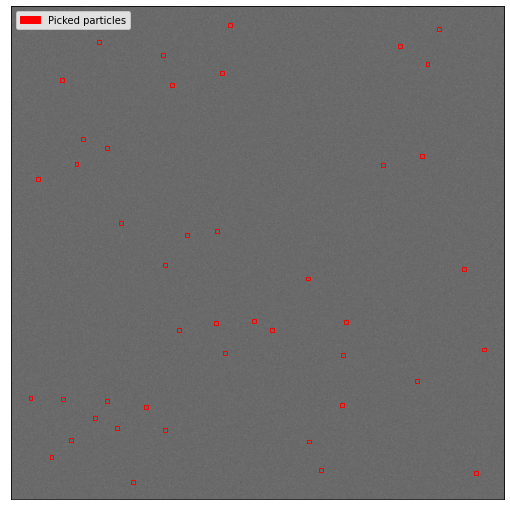

In [21]:
### plot the picked particles
ugraph_index = 0 # which micrograph to plot
metadata_index = 1 # which metadata file to plot

fig, ax = label_micrograph_picked(df_picked.groupby("metadata_filename").get_group(meta_files[metadata_index]), ugraph_index, config_dir, box_width=32, box_height=32, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)


plotted index 3; micrograph: 000003.mrc
Using box half width: 16.0 and half height: 16.0
number of boxes: 250


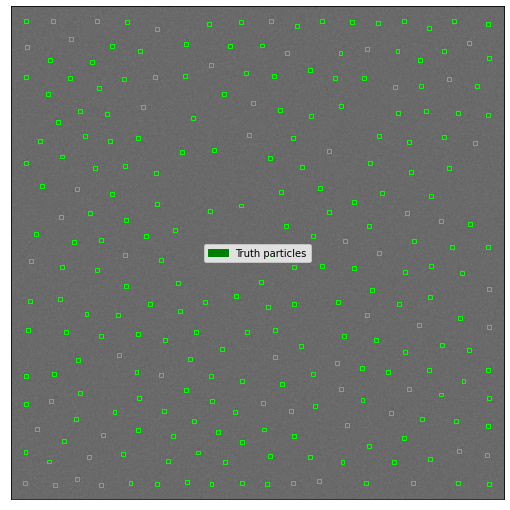

In [19]:
### plot the truth particles
ugraph_index = 3 # which micrograph to plot
metadata_index = 0 # which metadata file to plot

fig, ax = label_micrograph_truth(df_truth.groupby("metadata_filename").get_group(meta_files[metadata_index]), ugraph_index, config_dir, box_width=32, box_height=32, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)


plotted index 3; micrograph: 000003.mrc
Using box half width: 16.0 and half height: 16.0
number of boxes: 64
Using box half width: 16.0 and half height: 16.0
number of boxes: 250


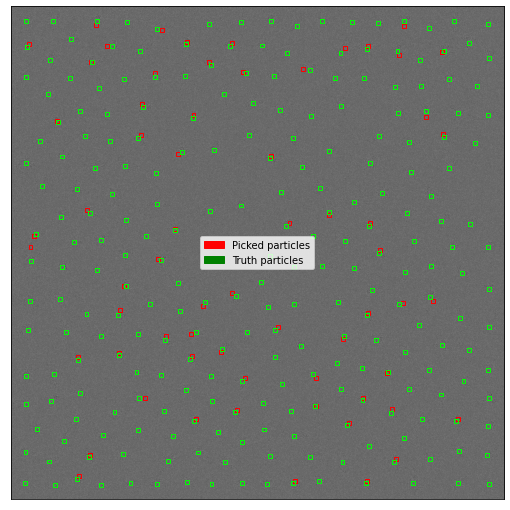

In [13]:
### plot the truth and picked particles
ugraph_index = 3 # which micrograph to plot
metadata_index = 1 # which metadata file to plot

fig, ax = label_micrograph_truth_and_picked(df_picked.groupby("metadata_filename").get_group(meta_files[metadata_index]),
                                             df_truth.groupby("metadata_filename").get_group(meta_files[metadata_index]),
                                               ugraph_index, config_dir, box_width=32, box_height=32, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)


In [22]:
### compute precision and recall
df_precision = analysis_picking.compute_precision(df_picked, df_truth)
df_precision

metadata_filename  \
metadata_filename                                  ugraph_filename                                                      
data/6xm5_steered_Roodmus_1/cryoSPARC/J293_pick... 000000.mrc       data/6xm5_steered_Roodmus_1/cryoSPARC/J293_pic...   
                                                   000001.mrc       data/6xm5_steered_Roodmus_1/cryoSPARC/J293_pic...   
                                                   000002.mrc       data/6xm5_steered_Roodmus_1/cryoSPARC/J293_pic...   
                                                   000003.mrc       data/6xm5_steered_Roodmus_1/cryoSPARC/J293_pic...   
                                                   000004.mrc       data/6xm5_steered_Roodmus_1/cryoSPARC/J293_pic...   
...                                                                                                               ...   
data/6xm5_steered_Roodmus_1/cryoSPARC/J433_pass... 000195.mrc       data/6xm5_steered_Roodmus_1/cryoSPARC/J433_pas...   
                                                   000196.mrc       data/6xm5_steered_Roodmus_1/cryoSPARC/J433_pas...   
                                                   000197.mrc       data/6xm5_steered_Roodmus_1/cryoSPARC/J433_pas...   
                                                   000198.mrc       data/6xm5_steered_Roodmus_1/cryoSPARC/J433_pas...   
                                                   000199.mrc       data/6xm5_steered_Roodmus_1/cryoSPARC/J433_pas...   

                                                                   ugraph_filename  \
metadata_filename                                  ugraph_filename                   
data/6xm5_steered_Roodmus_1/cryoSPARC/J293_pick... 000000.mrc           000000.mrc   
                                                   000001.mrc           000001.mrc   
                                                   000002.mrc           000002.mrc   
                                                   000003.mrc           000003.mrc   
                                                   000004.mrc           000004.mrc   
...                                                                            ...   
data/6xm5_steered_Roodmus_1/cryoSPARC/J433_pass... 000195.mrc           000195.mrc   
                                                   000196.mrc           000196.mrc   
                                                   000197.mrc           000197.mrc   
                                                   000198.mrc           000198.mrc   
                                                   000199.mrc           000199.mrc   

                                                                    precision  \
metadata_filename                                  ugraph_filename              
data/6xm5_steered_Roodmus_1/cryoSPARC/J293_pick... 000000.mrc        0.137950   
                                                   000001.mrc        0.139212   
                                                   000002.mrc        0.145042   
                                                   000003.mrc        0.145404   
                                                   000004.mrc        0.133371   
...                                                                       ...   
data/6xm5_steered_Roodmus_1/cryoSPARC/J433_pass... 000195.mrc        1.000000   
                                                   000196.mrc        0.805556   
                                                   000197.mrc        0.750000   
                                                   000198.mrc        0.958333   
                                                   000199.mrc        1.000000   

                                                                      recall  \
metadata_filename                                  ugraph_filename             
data/6xm5_steered_Roodmus_1/cryoSPARC/J293_pick... 000000.mrc       0.859649   
                                                   000001.mrc       0.874564   
                                 

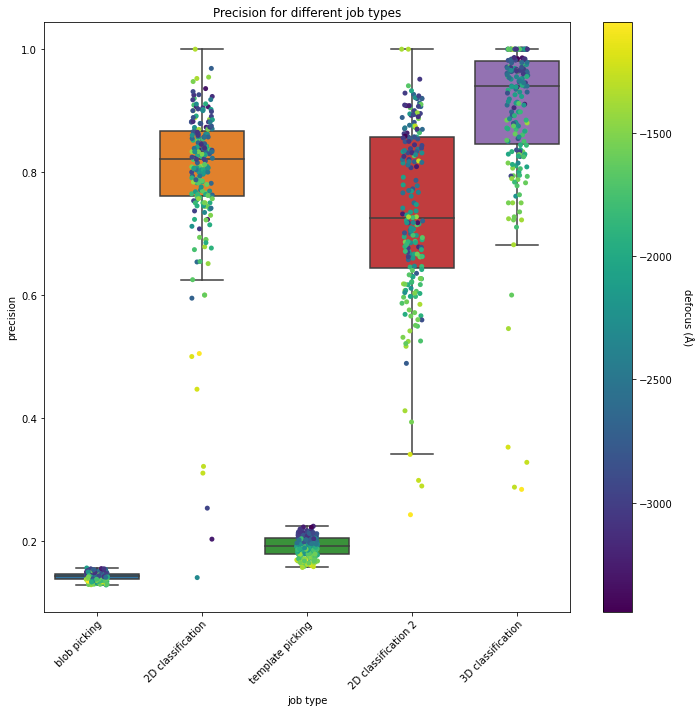

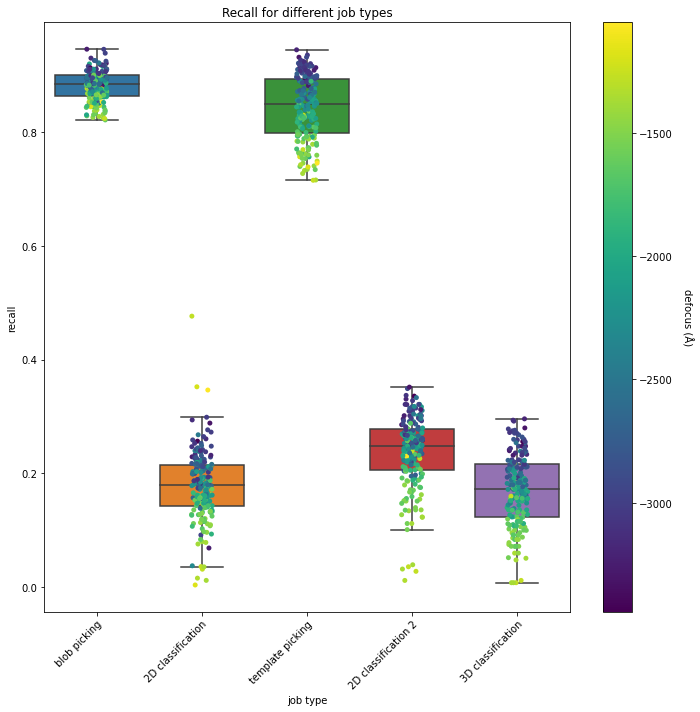

In [18]:
### plot boxplot for precision and recall


fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x="metadata_filename", y="precision", data=df_precision, ax=ax, fliersize=0)
sns.stripplot(x="metadata_filename", y="precision", data=df_precision, ax=ax, hue="defocus", alpha=1, palette="viridis")
# change the xticklabels to the jobtype
ax.set_xticklabels([jobtypes[metadata_filename] for metadata_filename in df_precision["metadata_filename"].unique()])
# remove legend
ax.get_legend().remove()
# add colorbar
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=df_precision["defocus"].min(), vmax=df_precision["defocus"].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("defocus (Å)", rotation=270, labelpad=20)
# add labels
ax.set_xlabel("job type")
ax.set_ylabel("precision")
ax.set_title("Precision for different job types")
# rotate xtiklabels 45 degrees
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fig.tight_layout()

fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x="metadata_filename", y="recall", data=df_precision, ax=ax, fliersize=0)
sns.stripplot(x="metadata_filename", y="recall", data=df_precision, ax=ax, hue="defocus", alpha=1, palette="viridis")
# change the xticklabels to the jobtype
ax.set_xticklabels([jobtypes[metadata_filename] for metadata_filename in df_precision["metadata_filename"].unique()])
# remove legend
ax.get_legend().remove()
# add colorbar
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=df_precision["defocus"].min(), vmax=df_precision["defocus"].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("defocus (Å)", rotation=270, labelpad=20)
# add labels
ax.set_xlabel("job type")
ax.set_ylabel("recall")
ax.set_title("Recall for different job types")
# rotate xtiklabels 45 degrees
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fig.tight_layout()
